## About Data.
The data collected from Darksky api website.
Its contain weather temprture, summary, describe, cloudCover,humidity,windSpeed and visibility.

## Problem Statment.
Forcasting the maxtemp to the next year.

In [325]:
#imort libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
#load data 
weather_data = pd.read_csv('clean_weather_data.csv')
#shows the first 5th rows 
weather_data.head()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
0,2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
1,2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2,2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
3,2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
4,2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [10]:
#shows the last 5th rows 
weather_data .tail()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
1790,2019-11-26,8.55,10.57,Mostly cloudy throughout the day.,rain,0.96,0.85,6.80,10.00
1791,2019-11-27,5.79,9.40,Mostly cloudy throughout the day.,rain,0.87,0.85,6.82,9.03
1792,2019-11-28,2.30,6.67,Mostly cloudy throughout the day.,partly-cloudy-day,0.40,0.79,5.15,10.00
1793,2019-11-29,1.08,6.14,Mostly cloudy throughout the day.,clear-day,0.18,0.76,4.85,9.11
1794,2019-11-30,0.42,5.69,Mostly cloudy throughout the day.,partly-cloudy-day,0.55,0.72,4.79,10.00


In [11]:
#data size 
weather_data .shape

(1795, 9)

In [12]:
# shange day type from string to timestamp
weather_data['day']=pd.to_datetime(weather_data['day'])


In [13]:
# to take only 2019 year for forcasting 
mask_2019 = (weather_data['day'] >= '2019-1-1') 


In [14]:
#creat dataframe for year 2019
weather_df=pd.DataFrame(data=weather_data[mask_2019])

In [15]:
#to set day as index 
weather_df.set_index('day',inplace=True)


In [16]:
weather_df.head()

,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
day,,,,,,,,
2019-01-01,-2.31,11.67,Partly cloudy throughout the day.,partly-cloudy-day,0.47,0.80,6.07,6.22
2019-01-02,-6.39,0.81,Overcast throughout the day.,partly-cloudy-day,0.66,0.96,0.73,5.76
2019-01-03,0.08,4.16,Overcast throughout the day.,cloudy,0.95,0.90,1.90,6.28
2019-01-04,3.27,7.12,Foggy in the morning.,cloudy,0.95,0.87,5.00,5.41
2019-01-05,2.78,6.06,Foggy overnight.,cloudy,0.95,0.84,4.47,5.83


In [17]:
# confraim there is no missing values 
weather_df.isnull().sum()

tempMin       0
tempMax       0
summary       0
desc          0
cloudCover    0
humidity      0
windSpeed     0
visibility    0
dtype: int64

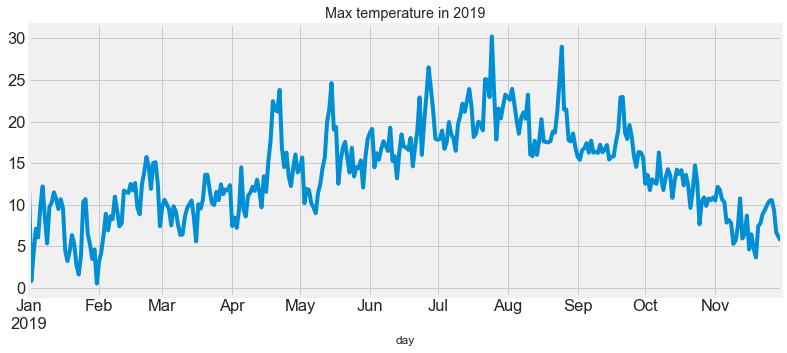

In [18]:
#plot that shows the tempmax in 2019 
weather_df['tempMax'].plot(lw=4, figsize=(12, 5))
plt.title('Max temperature in 2019')
plt.show()

In [19]:
# import seasonal_decopose to see the trend, seasonality and Residuals for tempmax 
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(x=weather_df['tempMax'], model='additive')
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

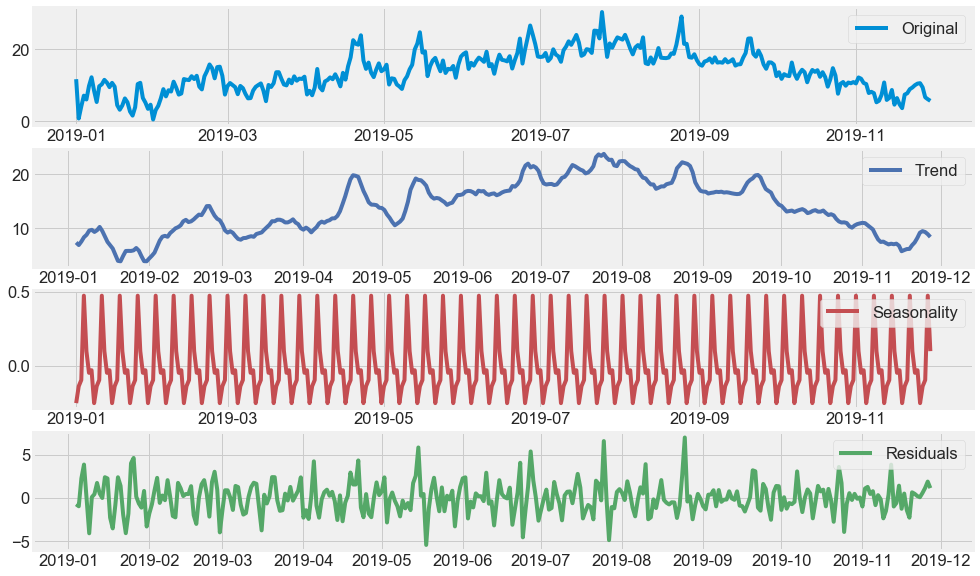

In [20]:
#drow plot to shows the resoult.
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(weather_df['tempMax'], label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

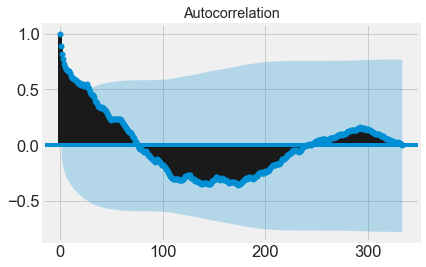

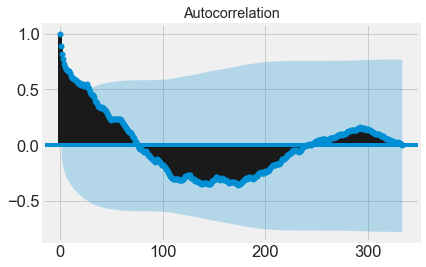

In [21]:
# check if the data is Stationary? 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(weather_df['tempMax'])

Stationary means mean, variance and covariance is constant over periods.
and here the data is not stationarity, so I have fixe it 

Text(0.5, 1.0, 'The most frequant weather in 2019')

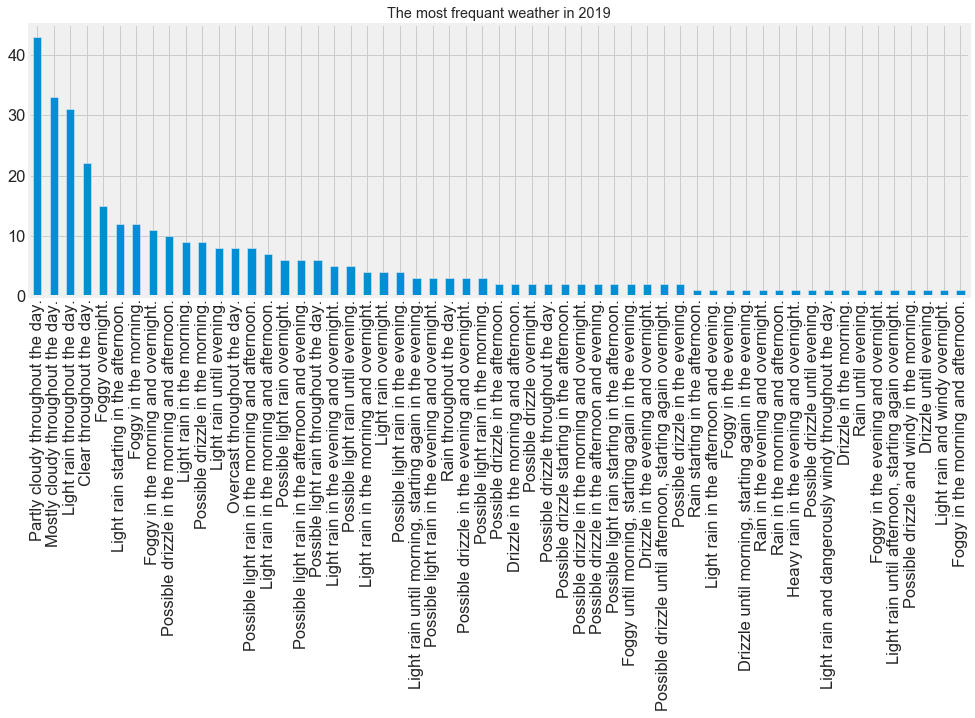

In [24]:
#chick which kind of weather is the most. 
weather_df.summary.value_counts().plot(kind='bar', figsize=(15,5))
plt.title('The most frequant weather in 2019')

Text(0.5, 1.0, 'most weather looks in 2019')

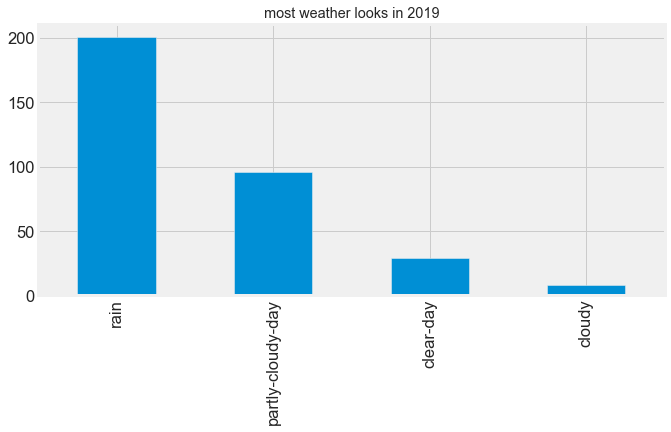

In [26]:
weather_df.desc.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('most weather looks in 2019')


Text(0.5, 1.0, ' min temperture in 2019 ')

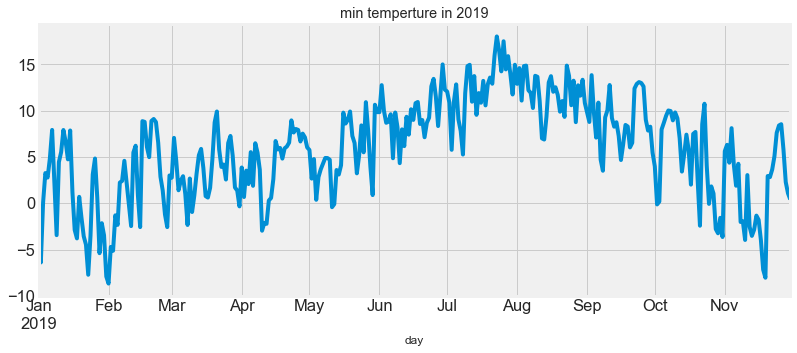

In [31]:
weather_df['tempMin'].plot(lw=4, figsize=(12, 5))
plt.title(' min temperture in 2019 ')

Text(0.5, 1.0, ' cloudCover in 2019 ')

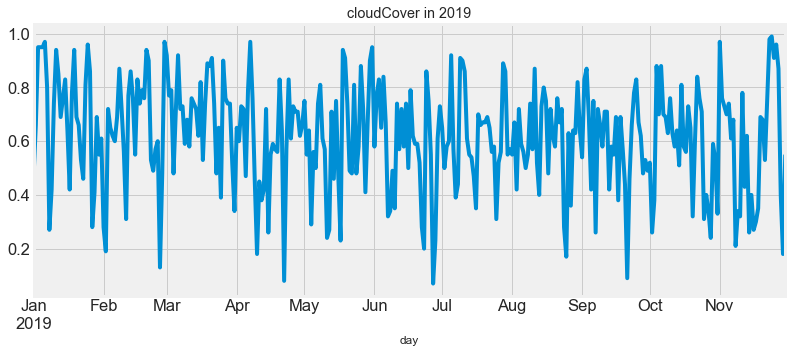

In [32]:
weather_df['cloudCover'].plot(lw=4, figsize=(12, 5))
plt.title(' cloudCover in 2019 ')

Text(0.5, 1.0, ' humidity in 2019 ')

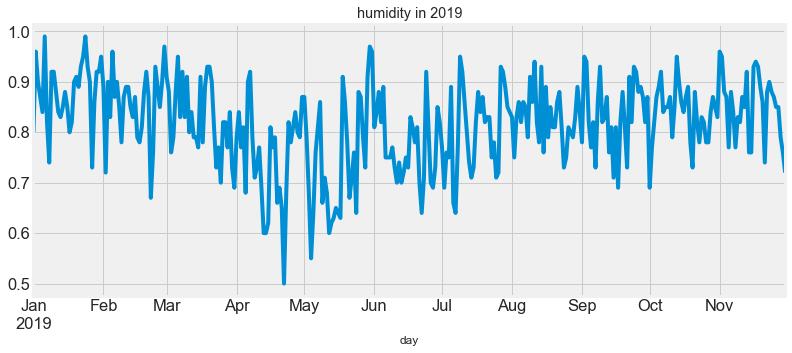

In [33]:
weather_df['humidity'].plot(lw=4, figsize=(12, 5))
plt.title(' humidity in 2019 ')

Text(0.5, 1.0, ' windSpeed in 2019 ')

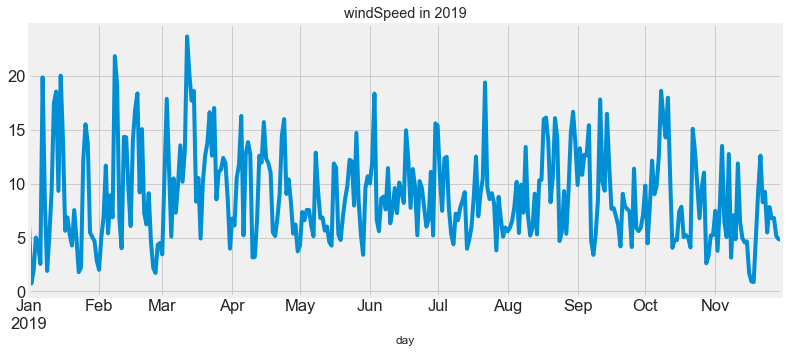

In [34]:
weather_df['windSpeed'].plot(lw=4, figsize=(12, 5))
plt.title(' windSpeed in 2019 ')

Text(0.5, 1.0, ' visibility in 2019 ')

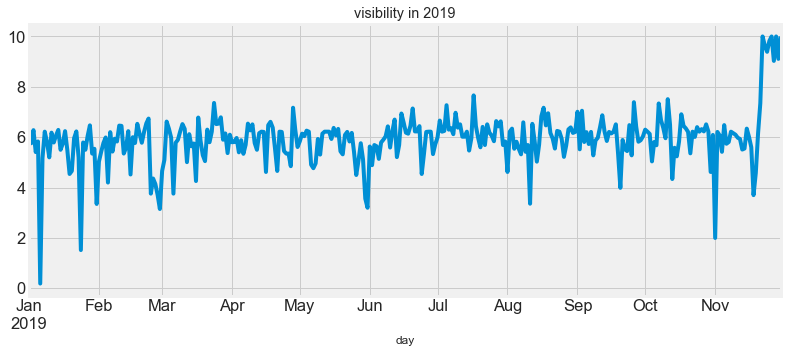

In [35]:
weather_df['visibility'].plot(lw=4, figsize=(12, 5))
plt.title(' visibility in 2019 ')  

In [36]:
#cweather_df size 
weather_df.shape

(334, 8)

In [233]:
#to change data into stationarity 
temp_diff = weather_df['tempMax'].diff(periods=300)
# # integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [234]:
temp_diff = temp_diff[1:]
temp_diff.head()

day
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-05   NaN
2019-01-06   NaN
Name: tempMax, dtype: float64

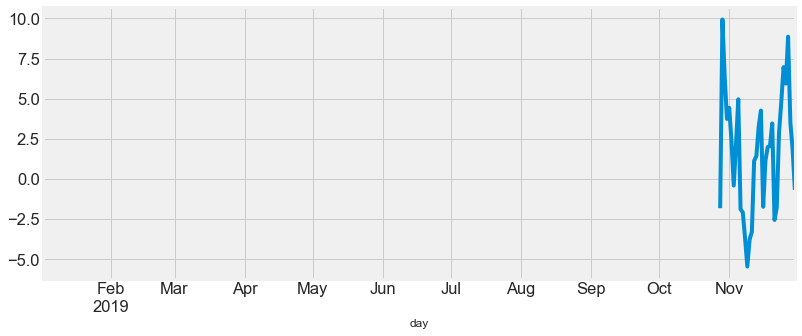

In [235]:
temp_diff.plot(lw=4, figsize=(12, 5))

In [324]:
weather_df.head()

,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
day,,,,,,,,
2019-01-01,-2.31,11.67,Partly cloudy throughout the day.,partly-cloudy-day,0.47,0.80,6.07,6.22
2019-01-02,-6.39,0.81,Overcast throughout the day.,partly-cloudy-day,0.66,0.96,0.73,5.76
2019-01-03,0.08,4.16,Overcast throughout the day.,cloudy,0.95,0.90,1.90,6.28
2019-01-04,3.27,7.12,Foggy in the morning.,cloudy,0.95,0.87,5.00,5.41
2019-01-05,2.78,6.06,Foggy overnight.,cloudy,0.95,0.84,4.47,5.83


In [237]:
X = df['tempMax'].values
train = X[0:167] # 167 data as train data
test = X[167:]  # 167 data as test data
predictions = []

# Autoreggresive AR Model

In [238]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [239]:
predictions = model_ar_fit.predict()

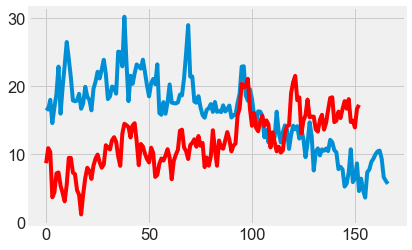

In [240]:
plt.plot(test)
plt.plot(predictions,color='red')


# ARIMA, ARMA ,AM model


first I decied to use grade search for ARIMA to find best hyperprametr 

In [317]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
   # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                     continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(weather_df['tempMax'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=23.436
ARIMA(0, 0, 1) MSE=9.856
ARIMA(0, 0, 2) MSE=7.637
ARIMA(0, 1, 0) MSE=4.415
ARIMA(0, 1, 1) MSE=4.247
ARIMA(0, 1, 2) MSE=4.091
ARIMA(0, 2, 0) MSE=10.344
ARIMA(0, 2, 1) MSE=4.455
ARIMA(1, 0, 0) MSE=4.242
ARIMA(1, 0, 1) MSE=4.145
ARIMA(1, 0, 2) MSE=4.005
ARIMA(1, 1, 0) MSE=4.305
ARIMA(1, 2, 0) MSE=7.844
ARIMA(2, 0, 0) MSE=4.178
ARIMA(2, 1, 0) MSE=4.127
ARIMA(2, 1, 1) MSE=4.715
ARIMA(2, 2, 0) MSE=6.108
ARIMA(2, 2, 1) MSE=4.152
ARIMA(4, 0, 0) MSE=4.073
ARIMA(4, 1, 0) MSE=4.115
ARIMA(4, 1, 1) MSE=4.682
ARIMA(4, 2, 0) MSE=5.320
ARIMA(4, 2, 1) MSE=4.130
ARIMA(6, 0, 0) MSE=4.071
ARIMA(6, 0, 1) MSE=3.995
ARIMA(6, 1, 0) MSE=4.110
ARIMA(6, 1, 1) MSE=4.704
ARIMA(6, 1, 2) MSE=4.638
ARIMA(6, 2, 0) MSE=5.111
ARIMA(8, 0, 0) MSE=4.016
ARIMA(8, 1, 0) MSE=4.127
ARIMA(8, 1, 1) MSE=4.124
ARIMA(8, 2, 0) MSE=4.761
ARIMA(8, 2, 1) MSE=4.104
ARIMA(10, 0, 0) MSE=4.009
ARIMA(10, 0, 1) MSE=4.019
ARIMA(10, 1, 0) MSE=4.162
ARIMA(10, 1, 1) MSE=4.262
ARIMA(10, 1, 2) MSE=4.400
ARIMA(10, 2, 0) MS

In [299]:
urate = weather_df.tempMax
udiff = urate.diff()[300:]

In [300]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, AR

In [318]:
model = ARIMA(urate,order=(6, 0, 1)).fit(trend='nc')
# nc stands for having no constant trend
# alternative (default) is c for constant
# including a constant gives a convergence warning

# use summary2 to produce the model output. This version fixes bugs from the summary function.
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 1558.9085 
Dependent Variable: tempMax          Log-Likelihood:      -756.21   
Date:               2019-12-04 21:55 Scale:               1.0000    
No. Observations:   334              Method:              css-mle   
Df Model:           7                Sample:              01-01-2019
Df Residuals:       327                                   11-30-2019
Converged:          1.0000           S.D. of innovations: 2.316     
No. Iterations:     20.0000          HQIC:                1540.576  
AIC:                1528.4194                                       
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
ar.L1.tempMax    1.6325    0.0373   43.8207  0.0000   1.5595   1.7055
ar.L2.tempMax   -0.6834    0.0702   -9.7350  0.0000  -0.8210  -0.5458
ar.L3.tempMax    0.1284    0.0988    1.2995  0.1947  -0.0653   0.3220
ar.L4.tempMax   -0.1169    0.1131   -1.0331  0.3023  -0.3386   0.1048
ar.L5.tempMax    0.0206    0.1085    0.1900  0.8494  -0.1920   0.2333
ar.L6.tempMax    0.0182    0.0587    0.3097  0.7570  -0.0968   0.1332
ma.L1.tempMax   -0.8966    0.0370  -24.2082  0.0000  -0.9692  -0.8240
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0016            -0.0000           1.0016            -0.0000
AR.2            1.5978            -0.4976           1.6735            -0.0481
AR.3            1.5978             0.4976           1.6735             0.0481
AR.4           -0.6297            -2.1026           2.1949            -0.2963
AR.5           -0.6297             2.1026           2.1949             0.2963
AR.6           -4.0724            -0.0000           4.0724            -0.5000
MA.1            1.1153             0.0000           1.1153             0.0000
====================================================================

"""

In [320]:
model = ARMA(udiff,order=(2,3))
# lbfgs optimization algorithm
# CSS = CSS minimises the sum of squared residuals.
# AIC, BIC= scoring and selecting the model

result = model.fit(start_params=[0,0,0,0,0],solver='lbfgs',method='css',trend='nc',ic='BIC')
# without setting start_params it might not succeed in finding the MLE (Maximul Likelihood Estimation)
# requires as many start_params as model parameters, i.e. p+q
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 135.3954  
Dependent Variable: tempMax          Log-Likelihood:      -57.300   
Date:               2019-12-04 21:56 Scale:               1.0000    
No. Observations:   34               Method:              css       
Df Model:           5                Sample:              10-30-2019
Df Residuals:       27                                    11-30-2019
Converged:          1.0000           S.D. of innovations: 1.450     
No. Iterations:     89.0000          HQIC:                129.516   
AIC:                126.6010                                        
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
ar.L1.tempMax     -0.1006    0.2097  -0.4799  0.6352  -0.5116  0.3103
ar.L2.tempMax      0.0173    0.2137   0.0810  0.9360  -0.4015  0.4361
ma.L1.tempMax     -0.1864    0.0961  -1.9403  0.0629  -0.3747  0.0019
ma.L2.tempMax     -0.0069    0.0993  -0.0695  0.9451  -0.2015  0.1876
ma.L3.tempMax      0.9146    0.1126   8.1254  0.0000   0.6940  1.1352
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -5.2310             0.0000           5.2310             0.5000
AR.2           11.0449             0.0000          11.0449             0.0000
MA.1            0.5505            -0.8348           1.0000            -0.1572
MA.2            0.5505             0.8348           1.0000             0.1572
MA.3           -1.0934            -0.0000           1.0934            -0.5000
====================================================================

"""

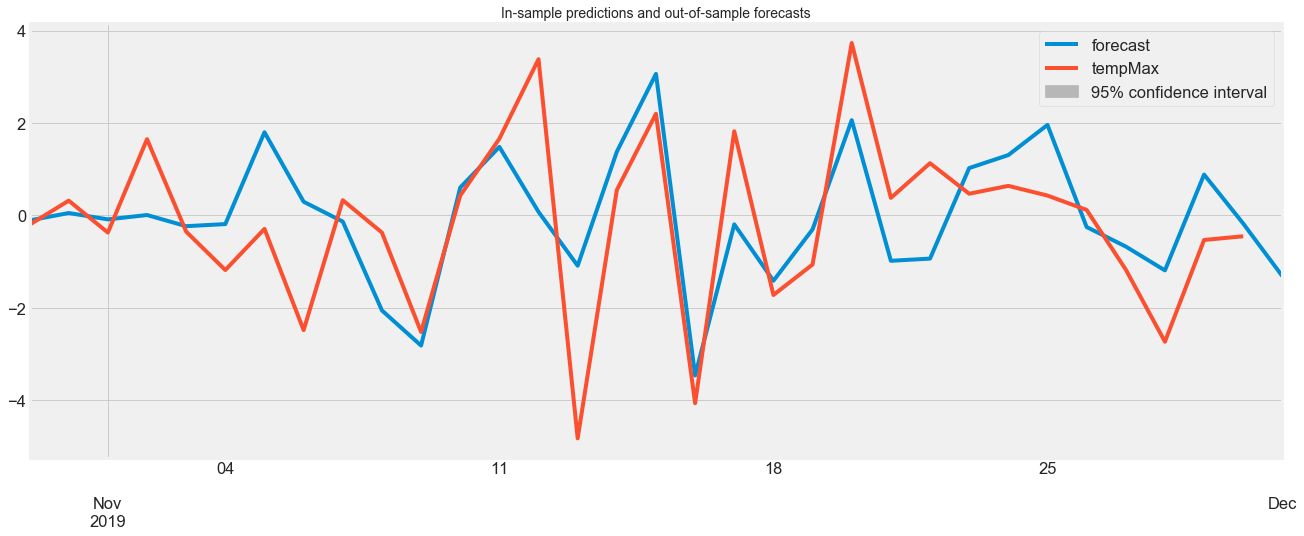

In [321]:
init_1 =2
end_1 = len(udiff)
fig, ax = plt.subplots(figsize=(20,8))
result.plot_predict(init_1,end_1,dynamic=False,plot_insample=True,ax=ax)
ax.set_title('In-sample predictions and out-of-sample forecasts',fontsize=14)
plt.show()

In [309]:
from sklearn.metrics import mean_squared_error

In [322]:
print('MSE sklearn:\t\t', mean_squared_error(udiff[2:], result.fittedvalues[:]))
print('MSE statsmodels:\t', result.sigma2)

MSE sklearn:		 2.103080763998237
MSE statsmodels:	 2.1030807639982365


In [323]:
# compare to baseline
mean_squared_error(udiff, [udiff.mean()] * len(udiff))

3.249767820069204